# Outlier Detection by using Zscore,Standard Deviation

**Zcore:How many Standard Deviations away from the mean.**

**Z*=+-1 ; one Standard Deviation Away from the mean to right and left. "68%"**

**Z*=+-2 ;Two Standard Deviation Away from the mean to right and left."95%"**

**Z*=+-3 ; Three Standard Deviation away from the mean to right and left. "99.7"%**

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats

In [19]:
df=pd.read_csv('C:/Users/Arushantha/Downloads/weight-height.csv')

In [20]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [30]:
df.shape

(10000, 3)

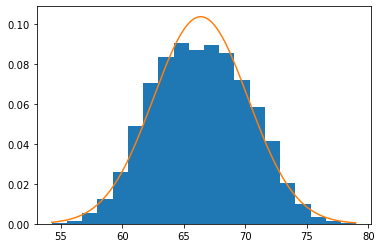

In [21]:
from scipy.stats import norm
plt.hist(df.Height,bins=20,density=True)

rang=np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rang,norm.pdf(rang,df.Height.mean(),df.Height.std()))

In [22]:
df.Height.mean()

66.36755975482106

In [23]:
df.Height.std()

3.847528120773233

In [24]:
upper_limit=df.Height.mean()+3*df.Height.std()
upper_limit

77.91014411714076

In [25]:
lower_limit=df.Height.mean()-3*df.Height.std()
lower_limit

54.82497539250136

In [34]:
df[(df.Height>upper_limit)|(df.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [41]:
df.no_outlier_std_dev=df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df.no_outlier_std_dev.shape

(9993, 3)

In [43]:
df.shape[0]-df.no_outlier_std_dev.shape[0]

7

**new column as Zscore 
Z=  Xi-Mean/std**

In [44]:
df['zscore']=(df.Height-df.Height.mean())/df.Height.std()

In [45]:
df

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [48]:
df[df.zscore>3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [49]:
df[df.zscore<-3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [51]:
df[(df.zscore>3)|(df.zscore<-3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [53]:
df.no_outlier=df[(df.zscore>-3)&(df.zscore<3)]
df.no_outlier.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [57]:
df.shape[0]-df.no_outlier.shape[0]

7